In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
submit_sample=pd.read_csv("./sample_submit.csv", header=None)

df = pd.concat([train, test], sort=False)
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2000 non-null   int64  
 1   age       2000 non-null   int64  
 2   sex       2000 non-null   object 
 3   bmi       2000 non-null   float64
 4   children  2000 non-null   int64  
 5   smoker    2000 non-null   object 
 6   region    2000 non-null   object 
 7   charges   1600 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 140.6+ KB


,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0.0
1,1,41,male,29.798725,1,no,southwest,0.0
2,2,28,male,32.722029,0,yes,northwest,1.0
3,3,20,female,38.429831,2,no,southeast,0.0
4,4,45,female,29.641854,1,no,northwest,0.0
5,5,20,male,37.785937,2,yes,southeast,1.0
6,6,37,male,43.393374,2,no,northeast,0.0
7,7,41,female,32.280407,1,no,northeast,0.0
8,8,40,male,28.865828,1,no,northeast,0.0
9,9,54,female,33.870887,2,no,northeast,0.0


# Pandas Profiling

In [3]:
#import pandas_profiling

# df.profile_report()

### Histogram

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

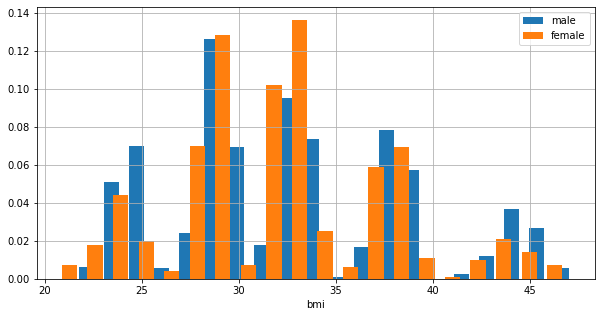

In [5]:
# Histogram BMI (male, female)
plt.figure(figsize=(10, 5))
plt.hist(train[train['sex']=='male']['bmi'], bins=20, label=['male'], rwidth=0.6,density=True)
plt.hist(train[train['sex']=='female']['bmi'], bins=20, label=['female'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

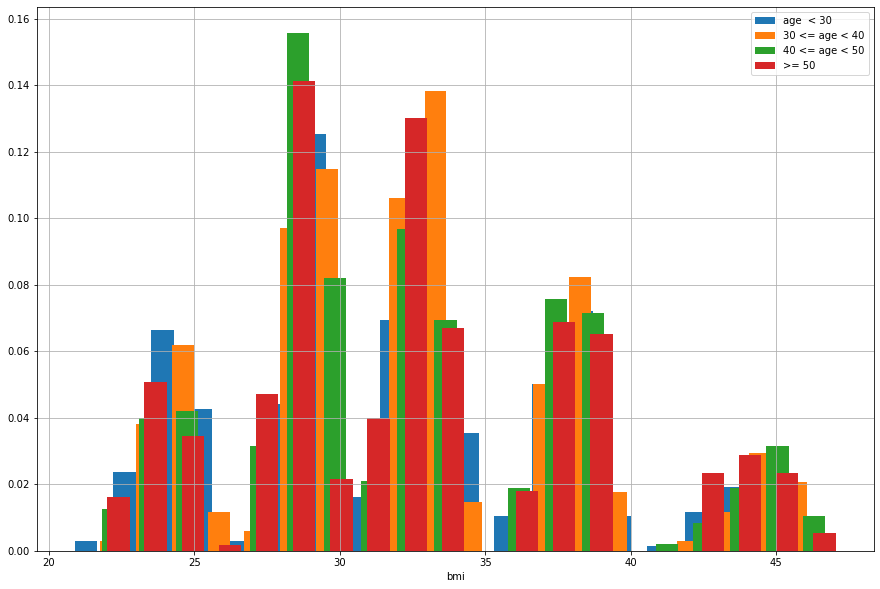

In [6]:
## Histogram BMI (male, female)
plt.figure(figsize=(15, 10))
plt.hist(train.query('age < 30')['bmi'], bins=20, label=['age  < 30'], rwidth=0.6,density=True)
plt.hist(train.query('30 <= age < 40')['bmi'], bins=20, label=['30 <= age < 40'], rwidth=0.6,density=True)
plt.hist(train.query('40 <= age < 50')['bmi'], bins=20, label=['40 <= age < 50'], rwidth=0.6,density=True)
plt.hist(train.query('age >= 50')['bmi'], bins=20, label=['>= 50'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [7]:
print(train['charges'].value_counts()/len(train['charges']))
train_bmi_normal = train.query('bmi < 25')['charges']
print(train_bmi_normal.value_counts()/len(train_bmi_normal))
train_bmi_preobese = train.query('25 <= bmi < 30')['charges']
print(train_bmi_preobese.value_counts()/len(train_bmi_preobese))
train_bmi_obese1 = train.query('30 <= bmi < 35')['charges']
print(train_bmi_obese1.value_counts()/len(train_bmi_obese1))
train_bmi_obese2 = train.query('35 <= bmi < 40')['charges']
print(train_bmi_obese2.value_counts()/len(train_bmi_obese2))
train_bmi_obese3 = train.query('40 <= bmi')['charges']
print(train_bmi_obese3.value_counts()/len(train_bmi_obese3))

0    0.78500
1    0.12375
2    0.09125
Name: charges, dtype: float64
0    0.889423
1    0.100962
2    0.009615
Name: charges, dtype: float64
0    0.770878
1    0.209850
2    0.019272
Name: charges, dtype: float64
0    0.823404
1    0.100000
2    0.076596
Name: charges, dtype: float64
0    0.694534
2    0.228296
1    0.077170
Name: charges, dtype: float64
0    0.750000
2    0.194444
1    0.055556
Name: charges, dtype: float64


In [8]:
# BMI WHO基準
df.loc[df['bmi'] < 25, 'bmi_who'] = 1
df.loc[((df['bmi'] >= 25) & (df['bmi'] < 30)), 'bmi_who'] = 2
df.loc[((df['bmi'] >= 30) & (df['bmi'] < 35)), 'bmi_who'] = 3
df.loc[((df['bmi'] >= 35) & (df['bmi'] < 40)), 'bmi_who'] = 4
df.loc[(df['bmi'] >= 40), 'bmi_who'] = 5
df.head(20)

,id,age,sex,bmi,children,smoker,region,charges,bmi_who
0,0,26,male,32.665465,3,no,southeast,0.0,3.0
1,1,41,male,29.798725,1,no,southwest,0.0,2.0
2,2,28,male,32.722029,0,yes,northwest,1.0,3.0
3,3,20,female,38.429831,2,no,southeast,0.0,4.0
4,4,45,female,29.641854,1,no,northwest,0.0,2.0
5,5,20,male,37.785937,2,yes,southeast,1.0,4.0
6,6,37,male,43.393374,2,no,northeast,0.0,5.0
7,7,41,female,32.280407,1,no,northeast,0.0,3.0
8,8,40,male,28.865828,1,no,northeast,0.0,2.0
9,9,54,female,33.870887,2,no,northeast,0.0,3.0


### Divide dataset into two parts (categorical , numerical)

In [9]:
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("CategoricaL:\n{}".format(categorical))
print("\nNumericaL:\n{}".format(numerical))

CategoricaL:
['sex', 'smoker', 'region']

NumericaL:
['id', 'age', 'bmi', 'children', 'charges', 'bmi_who']


### Heat map for Correlation coefficient

<AxesSubplot:>

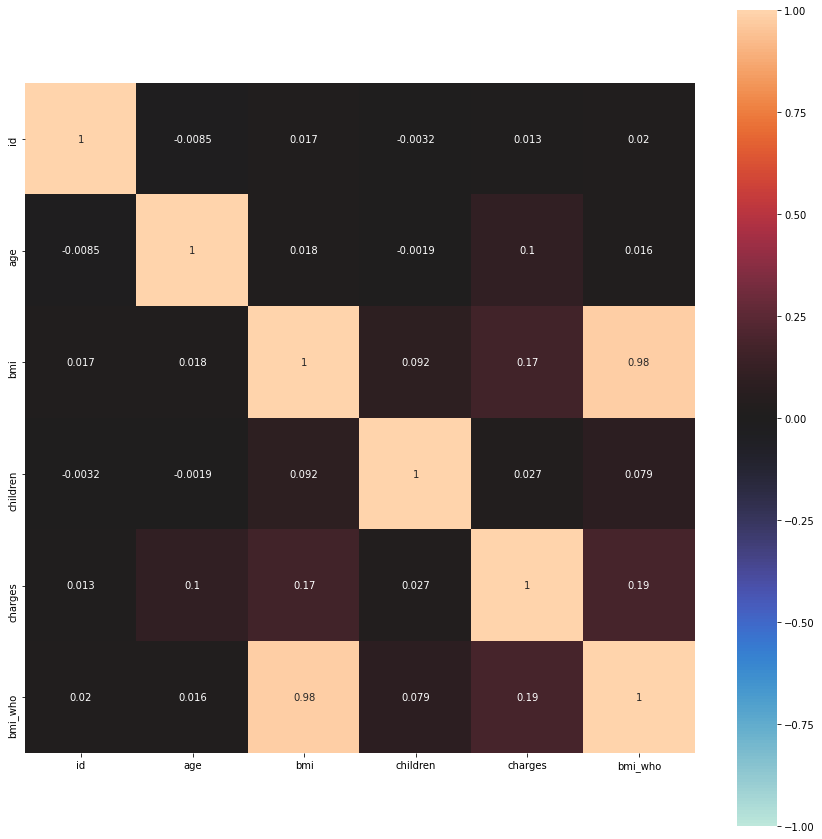

In [10]:
df_corr = df.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, square=True, annot=True)

### Scatter plot

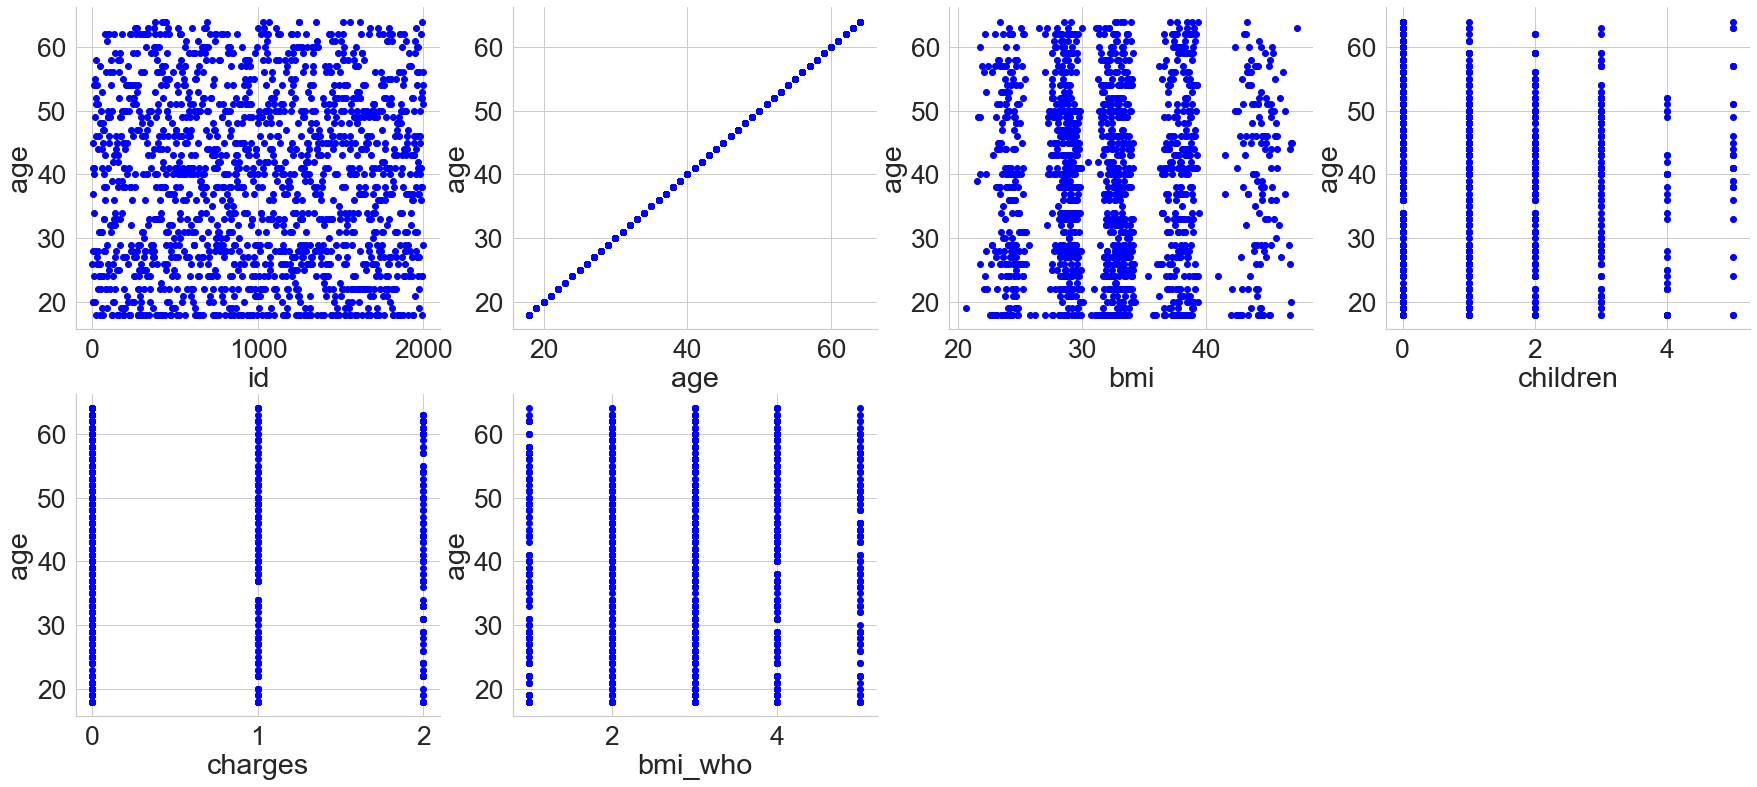

In [11]:
# We shall plot these figures
plt.figure(figsize=(30, 70))
sns.set(font_scale= 2.4)
sns.set_style('whitegrid')

for i, features in enumerate(numerical):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=df.iloc[:len(train)], x=features, y='age', color ="blue")
    plt.xlabel(features)
    plt.ylabel('age')
    
sns.despine()

### Creating Dummy values

In [12]:
df =pd.get_dummies(df, columns=categorical, drop_first=True)

### Separate Data

In [13]:
#df = pd.get_dummies(df)
train = df[:len(train)]
test = df[len(train):]
df.head()

,id,age,bmi,children,charges,bmi_who,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,26,32.665465,3,0.0,3.0,1,0,0,1,0
1,1,41,29.798725,1,0.0,2.0,1,0,0,0,1
2,2,28,32.722029,0,1.0,3.0,1,1,1,0,0
3,3,20,38.429831,2,0.0,4.0,0,0,0,1,0
4,4,45,29.641854,1,0.0,2.0,0,0,1,0,0


### LightGBM

In [14]:
y_train = train['charges']
X_train = train.drop(['id','charges'], axis=1)
X_test = test.drop(['id','charges'], axis=1)


In [15]:
import optuna.integration.lightgbm as lgb # Optuna 
#import lightgbm as lgb 
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score

In [ ]:
y_lgb_preds = []
models = []
y_lgb_oof_train = np.zeros((len(X_train),3))
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'metric' : 'multi_logloss',
    'max_bin' : 255,
    'num_leaves' : 40,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : -1
}

# Cross Validation
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train,y_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[valid_index]
    
    # Train Dataset
    lgb_train = lgb.Dataset(X_tr, y_tr)

    # Evaluation Dataset (early_stopping_rounds)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    evals_result = {} #結果を格納するための辞書
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    valid_names=['train','eval'],
                    num_boost_round=1000,
                    early_stopping_rounds=10,
                    verbose_eval=100,
                    evals_result=evals_result
                   )
    # Out-of-hold of train data
    y_lgb_oof_train[valid_index] = \
        gbm.predict(X_val, num_iteration=gbm.best_iteration)
    
    # Prediction for X_test data
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    # Append Prediction data 
    y_lgb_preds.append(y_pred)
    models.append(gbm)


[I 2021-06-12 21:11:58,650] A new study created in memory with name: no-name-fab33987-c69b-48c5-bc69-1588052f0f1c
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.37984	eval's multi_logloss: 0.432986
[200]	train's multi_logloss: 0.280768	eval's multi_logloss: 0.380267
Early stopping, best iteration is:
[276]	train's multi_logloss: 0.234577	eval's multi_logloss: 0.365956


feature_fraction, val_score: 0.365956:  14%|######4                                      | 1/7 [00:01<00:06,  1.10s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.345044	eval's multi_logloss: 0.39215
[200]	train's multi_logloss: 0.249504	eval's multi_logloss: 0.356125
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.233123	eval's multi_logloss: 0.3531


feature_fraction, val_score: 0.353100:  29%|############8                                | 2/7 [00:01<00:04,  1.03it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246705	eval's multi_logloss: 0.350544
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233547	eval's multi_logloss: 0.348134


feature_fraction, val_score: 0.348134:  43%|###################2                         | 3/7 [00:02<00:03,  1.03it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.37984	eval's multi_logloss: 0.432986
[200]	train's multi_logloss: 0.280768	eval's multi_logloss: 0.380267


feature_fraction, val_score: 0.348134:  43%|###################2                         | 3/7 [00:04<00:03,  1.03it/s]

Early stopping, best iteration is:
[276]	train's multi_logloss: 0.234577	eval's multi_logloss: 0.365956


feature_fraction, val_score: 0.348134:  57%|#########################7                   | 4/7 [00:04<00:03,  1.03s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3516	eval's multi_logloss: 0.399054
[200]	train's multi_logloss: 0.254276	eval's multi_logloss: 0.357537
Early stopping, best iteration is:
[241]	train's multi_logloss: 0.227711	eval's multi_logloss: 0.352278


feature_fraction, val_score: 0.348134:  71%|################################1            | 5/7 [00:05<00:02,  1.01s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.481469	eval's multi_logloss: 0.546981
[200]	train's multi_logloss: 0.388773	eval's multi_logloss: 0.503611
Early stopping, best iteration is:
[279]	train's multi_logloss: 0.339319	eval's multi_logloss: 0.484384


feature_fraction, val_score: 0.348134:  86%|######################################5      | 6/7 [00:05<00:00,  1.01it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.364245	eval's multi_logloss: 0.414978
[200]	train's multi_logloss: 0.265242	eval's multi_logloss: 0.366107
Early stopping, best iteration is:
[257]	train's multi_logloss: 0.229109	eval's multi_logloss: 0.35894


num_leaves, val_score: 0.348134:   0%|                                                          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.414792	eval's multi_logloss: 0.406533
[200]	train's multi_logloss: 0.370958	eval's multi_logloss: 0.36887
[300]	train's multi_logloss: 0.350392	eval's multi_logloss: 0.35756


num_leaves, val_score: 0.348134:   5%|##5                                               | 1/20 [00:00<00:04,  3.94it/s]

Early stopping, best iteration is:
[303]	train's multi_logloss: 0.349956	eval's multi_logloss: 0.357462
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:  10%|#####                                             | 2/20 [00:01<00:10,  1.76it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:  15%|#######5                                          | 3/20 [00:01<00:12,  1.40it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391752	eval's multi_logloss: 0.389953
[200]	train's multi_logloss: 0.339984	eval's multi_logloss: 0.352114


num_leaves, val_score: 0.345462:  20%|##########                                        | 4/20 [00:02<00:08,  1.82it/s]

Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32093	eval's multi_logloss: 0.345462
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  25%|############5                                     | 5/20 [00:03<00:10,  1.48it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  30%|###############                                   | 6/20 [00:03<00:10,  1.37it/s]

### Validation data vs Prediction Data

In [ ]:
train_metric = evals_result['train']['multi_logloss']
eval_metric = evals_result['eval']['multi_logloss']

train_metric[:5], eval_metric[:5]

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(train_metric, label='train multi_logloss')
plt.plot(eval_metric, label='eval multi_logloss')
plt.grid()
plt.legend()
plt.ylim(0 , 0.6)

plt.xlabel('rounds')
plt.ylabel('multi_logloss')
plt.grid(True)
plt.show()

In [ ]:
y_lgb_oof_train_max = np.argmax(y_lgb_oof_train, axis=1)
print(f1_score(y_true=y_train, y_pred=y_lgb_oof_train_max, average='macro'))

# LGB plog importance
lgb.plot_importance(gbm, height=0.5, figsize=(8,8))

In [ ]:
y_pred_max = np.argmax(sum(y_lgb_preds)/len(y_lgb_preds), axis=1)
y_pred_max = list(y_pred_max)
y_pred_max[:10]

In [ ]:
submit_sample.head()

提出

In [ ]:
submit_sample[1] = y_pred_max
submit_sample.to_csv('submit.csv',index = False,  header=None)

In [ ]:
submit_sample.head()